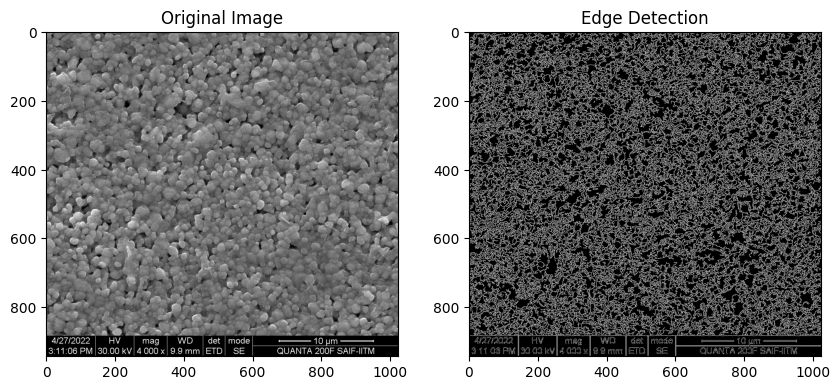

In [3]:
# New Image Processing: Apply Edge Detection
import cv2
import matplotlib.pyplot as plt

# Read the original TIFF image
original_image = cv2.imread("DS-115_003.tif", 1)

# Check if the image is loaded successfully
if original_image is None:
    print("Error: Image not loaded. Please check the file path.")
else:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray_image, 50, 150)

    # Display the original and edge-detected images side by side
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 2, 2)
    plt.title("Edge Detection")
    plt.imshow(edges, cmap='gray')

    plt.show()


In [8]:
# New Analysis: Texture Analysis using GLCM (Gray Level Co-occurrence Matrix)
import mahotas.features.texture as texture
import numpy as np  # Add this line to import NumPy

# Convert the image to uint8 (mahotas requires images to be in this format)
gray_image_uint8 = (gray_image * 255).astype(np.uint8)

# Compute GLCM
glcm = texture.haralick(gray_image_uint8, return_mean=True)

# Display the GLCM features
print("GLCM Features:")
print(glcm)


GLCM Features:
[ 2.89269788e-03  2.57721928e+02  9.34308934e-01  1.96208965e+03
  1.46484467e-01  2.69567101e+02  7.59063667e+03  7.68696702e+00
  1.22602417e+01  1.55325247e-04  4.89339344e+00 -1.91658383e-01
  9.61463192e-01]


d:\Python 3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


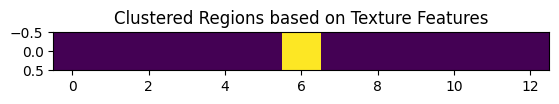

In [12]:
# Resize the original image to match the size of the flattened GLCM
resized_original_image = cv2.resize(original_image, (len(glcm_flat), 1))

# Flatten the GLCM
glcm_flat = glcm.flatten()

# Reshape for clustering
glcm_flat = np.reshape(glcm_flat, (-1, 1))

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(glcm_flat)

# Reshape the labels to the resized original image shape
cluster_labels = kmeans.labels_.reshape(resized_original_image.shape[0], resized_original_image.shape[1])

# Display the clustered regions
plt.imshow(cluster_labels, cmap='viridis', interpolation='nearest')
plt.title("Clustered Regions based on Texture Features")
plt.show()


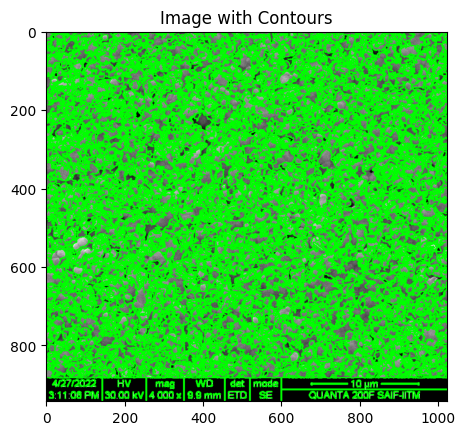

In [13]:
# New Contour Analysis: Identify and Draw Contours on the Edge-detected Image
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the original image
image_with_contours = original_image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

# Display the image with contours
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.title("Image with Contours")
plt.show()


In [18]:
# Extract texture features for each contour region
features = []
labels = []

# Minimum number of pixels required for haralick computation
min_pixels_for_haralick = 10

for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    region = object_mask[y:y+h, x:x+w]
    
    # Print information about the region
    print(f"Region Shape: {region.shape}, Non-Zero Pixels: {np.sum(region)}")
    
    # Check if the region has sufficient pixels
    if np.sum(region) > min_pixels_for_haralick:
        # Calculate texture features using GLCM for each region
        try:
            glcm_region = texture.haralick(region.astype(np.uint8), return_mean=True)
            glcm_features = glcm_region.flatten()

            # Additional features (e.g., area, perimeter)
            props = regionprops(region.astype(int))[0]
            additional_features = [props.area, props.perimeter]

            # Combine texture features and additional features
            combined_features = np.concatenate((glcm_features, additional_features))

            features.append(combined_features)

            # Example label: 1 for objects, 0 for background
            labels.append(1)
        except Exception as e:
            print(f"Error computing haralick features: {e}")
    else:
        print("Region does not have sufficient pixels for haralick computation")

# Convert lists to arrays
features = np.array(features)
labels = np.array(labels)


Region Shape: (1, 1), Non-Zero Pixels: 255
Error computing haralick features: mahotas.haralick_features: the input is empty. Cannot compute features!
This can happen if you are using `ignore_zeros`
Region Shape: (1, 1), Non-Zero Pixels: 255
Error computing haralick features: mahotas.haralick_features: the input is empty. Cannot compute features!
This can happen if you are using `ignore_zeros`
Region Shape: (1, 1), Non-Zero Pixels: 255
Error computing haralick features: mahotas.haralick_features: the input is empty. Cannot compute features!
This can happen if you are using `ignore_zeros`
Region Shape: (1, 2), Non-Zero Pixels: 510
Error computing haralick features: mahotas.haralick_features: the input is empty. Cannot compute features!
This can happen if you are using `ignore_zeros`
Region Shape: (1, 1), Non-Zero Pixels: 255
Error computing haralick features: mahotas.haralick_features: the input is empty. Cannot compute features!
This can happen if you are using `ignore_zeros`
Region Sha